# VAE+GAN

In [4]:
%matplotlib inline
import sys, os
import numpy as np
import pandas as pd
import six
import math

from PIL import Image
from StringIO import StringIO
import matplotlib.pyplot as plt

import chainer
from chainer import cuda, Function, gradient_check, Variable, optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.functions.loss.vae import gaussian_kl_divergence


In [9]:
from vaegan import Encoder, Decoder, Discriminator, EncDec
from fauxtograph import VAEGAN, get_paths, image_resize

In [14]:
paths = get_paths('../../sample_images/sample_train/')
print len(paths)

200


In [7]:
vg = VAEGAN(img_width=96, img_height=96, flag_gpu=False)

In [18]:
# 画像ファイルのロード、正規化、transpose
x_all = vg.load_images(paths)
print 'image_data_shape = {}'.format(x_all.shape)

100%|██████████| 200/200 [00:00<00:00, 912.76it/s]

Image Files Loaded!
image_data_shape = (200, 3, 96, 96)


In [19]:
m_path = './out/model/'
im_path = './out/images/'

In [20]:
vg.fit(x_all, save_freq=2, pic_freq=30, n_epochs=4, model_path = m_path, img_path=im_path, mirroring=True)

  0%|          | 0/4 [00:00<?, ?it/s]

epoch: 1


  0%|          | 0/4 [00:00<?, ?it/s]

enc_loss = 2.25910395384, dec_loss = 0.882715031505 , disc_loss = 0.854047849774
gan_loss = 0.854047849774, sim_loss = 1.73676288128, kl_loss = 0.522341094911
time: 51.413950


epoch: 2


  0%|          | 0/4 [00:00<?, ?it/s]

enc_loss = 2.12076449394, dec_loss = 0.929830908775 , disc_loss = 0.686006069183
gan_loss = 0.686006069183, sim_loss = 1.61583697796, kl_loss = 0.504927515984
time: 61.421006


epoch: 3


  0%|          | 0/4 [00:00<?, ?it/s]

enc_loss = 1.96383017302, dec_loss = 0.933434635401 , disc_loss = 0.600162386894
gan_loss = 0.600162386894, sim_loss = 1.53359702229, kl_loss = 0.430233150721
time: 53.817401


epoch: 4


100%|██████████| 4/4 [00:54<00:00, 13.55s/it]


enc_loss = 1.82789364457, dec_loss = 0.913124740124 , disc_loss = 0.540206037462
gan_loss = 0.540206037462, sim_loss = 1.45333078504, kl_loss = 0.374562866986
time: 62.552557




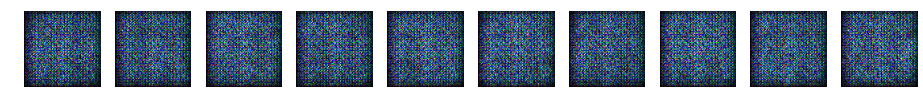

In [ ]:
shape = 10, vg.latent_width
random_data = np.random.standard_normal(shape).astype('f')*3.
images = vg.inverse_transform(random_data, test=True)
plt.figure(figsize=(16,3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()
